# Regression -- Kaggle| House Price Prediction

Following from Tutorial 1, we are going to use regression to predict the house price.

Competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Stacked Regression: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

Download data from: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### Description:

With 79 explanatory variables describing (almost) every aspect of residential homes, this competition challenges you to predict the final price of each home.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Contents:

* step 0. import data
* step 1. Data Preprocessing
    * step 1.1 remove outliers
    * step 1.2 log-transform of target variable
    * step 1.3 handling missing data for both training data and testing data
    * step 1.4 Transforming some numerical variables that are really categorical
    * step 1.5 Adding one more important feature
    * step 1.6 Box Cox transformation of (highly) skewed numerical features
    * step 1.7 Label Encoding some categorical variables that may contain information in their ordering set
    * step 1.8 getting the new train and test set
* step 2. Modeling
    * step 2.1 Define a cross validation strategy
    * step 2.2 Linear regression without variable selection
    * step 2.3 Linear regression without hand-selected variables
    * step 2.4 Lasso with all variables and parameter turning
    * step 2.5 Ridge Regression with all variables and parameter turning
    * step 2.6 Principle Component Regression with all variables and parameter turning
    * step 2.7 ElasticNet with all variables and parameter turning
    * step 2.8 Partial Least Sqaure Regression with all variables and parameter turning

## step 0. import data

In [2]:
df_train = pd.read_csv('./data/house-price/train.csv')
df_test = pd.read_csv('./data/house-price/test.csv')
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
##display the first five rows of the train dataset.
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##display the first five rows of the test dataset.
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

## Step 1. Data Preprocessing

### step 1.1  remove outliers

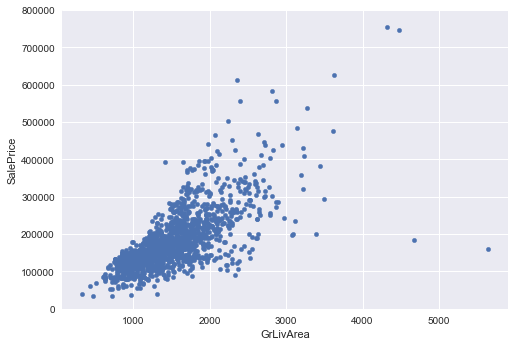

In [6]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'  # Above ground living area square feet
df_train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [7]:
#deleting points with top 2 largest 'GrLivArea'
outliers = df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
print(outliers['GrLivArea'])
df_train = df_train.drop(outliers['GrLivArea'].index)

1298    5642
523     4676
Name: GrLivArea, dtype: int64


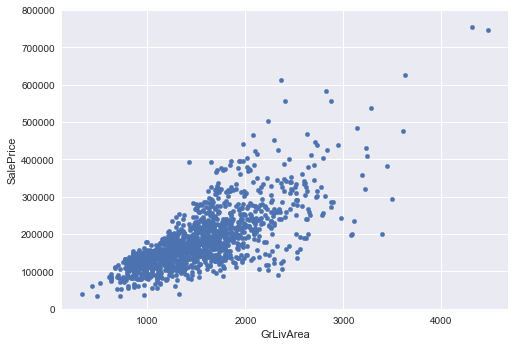

In [8]:
#check the plot grlivarea/saleprice again
var = 'GrLivArea'  # Above ground living area square feet
df_train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### step 1.2 log-transform of target variable

/Users/zhicongliang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

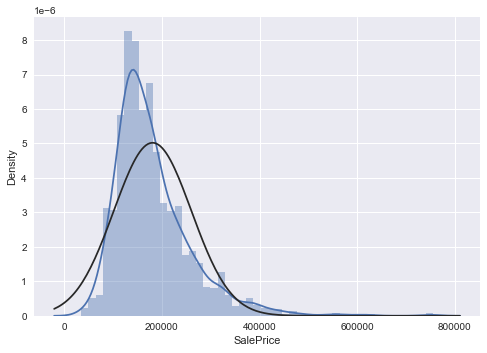

In [9]:
# histogram and normal probability plot
# fit=norm here further plots the curve of normal distribution with the same mean and variance as df_train['SalePrice']
sns.distplot(df_train['SalePrice'], fit=norm)

/Users/zhicongliang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

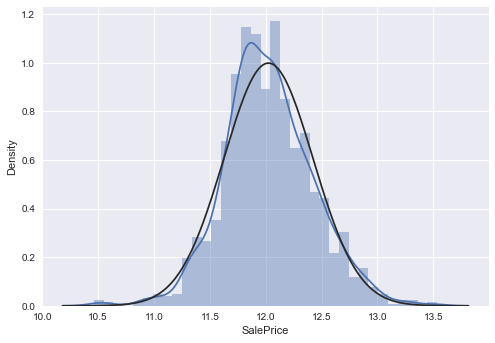

In [10]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'], fit=norm)

### step 1.3 handling missing data for both training data and testing data

In [11]:
# we firstly concatenate the train and test data in the same dataframe
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [12]:
# count NaN in each columns and sort them in descending order
total = all_data.isnull().sum().sort_values(ascending=False)
percent = total/all_data.shape[0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageCond,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508


In [13]:
# imputing missing values
# no pool
all_data["PoolQC"] = all_data["PoolQC"].fillna("None") 
# data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
# data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")
# data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")
# data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
# LotFrontage : Since the area of each street connected to the house property most likely 
# have a similar area to other houses in its neighborhood, 
# we can fill in missing values by the median LotFrontage of the neighborhood.
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : 
# missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
# For all these categorical basement-related features, NaN means that there is no basement.  
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. 
# We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. 
# So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
# Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)
# Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")
# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
# SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
# MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [14]:
# check if we still have missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = total/all_data.shape[0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
SaleCondition,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0


### step 1.4 Transforming some numerical variables that are really categorical

In [15]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### step 1.5 Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [16]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [17]:
all_data.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
TotalSF          float64
Length: 79, dtype: object

### step 1.6 Box Cox transformation of (highly) skewed numerical features

In [18]:
# get all numerical feature
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

from scipy.stats import norm, skew
# Check the skewness of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(-1)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [19]:
# We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x .
# Note that setting  λ=0  is equivalent to log1p used above for the target variable.
# See http://onlinestatbook.com/2/transformations/box-cox.html for more details on Box Cox Transformation 
# as well as the scipy function's page: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

There are 33 skewed numerical features to Box Cox transform


In [20]:
# check skewness after box-cox transformation
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skewness of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(-1)


Skew in numerical features: 



,Skew
PoolArea,15.759529
3SsnPorch,8.921650
LowQualFinSF,8.741030
MiscVal,5.594963
BsmtHalfBath,3.786685
KitchenAbvGr,3.697303
ScreenPorch,2.977052
BsmtFinSF2,2.563235
EnclosedPorch,2.024321
MasVnrArea,0.637388


### step 1.7 Label Encoding some categorical variables that may contain information in their ordering set

In [21]:
#convert categorical variable into dummy
all_data = pd.get_dummies(all_data)

In [22]:
all_data.columns[all_data.columns.str.contains('MSSubClass')]

Index(['MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90'],
      dtype='object')

In [23]:
all_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.831328,19.212182,2.440268,14.187527,14.187527,8.059126,11.170327,0.0,7.483296,11.692623,...,0,0,0,1,0,0,0,0,1,0
1,6.221214,19.712205,2.259674,14.145138,14.145138,0.000000,12.062832,0.0,8.897844,12.792276,...,0,0,0,1,0,0,0,0,1,0
2,5.914940,20.347241,2.440268,14.184404,14.185966,7.646538,10.200343,0.0,9.917060,11.892039,...,0,0,0,1,0,0,0,0,1,0
3,5.684507,19.691553,2.440268,14.047529,14.135652,0.000000,8.274266,0.0,10.468500,11.354094,...,0,0,0,1,1,0,0,0,0,0
4,6.314735,21.325160,2.602594,14.182841,14.182841,9.391827,10.971129,0.0,10.221051,12.510588,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,3.932510,14.081426,1.820334,14.135652,14.135652,0.000000,0.000000,0.0,10.496872,10.496872,...,0,0,0,1,0,0,0,0,1,0
2913,3.932510,14.013314,1.820334,14.135652,14.135652,0.000000,8.622254,0.0,8.978567,10.496872,...,0,0,0,1,1,0,0,0,0,0
2914,7.620056,22.782058,2.055642,14.119786,14.176584,0.000000,12.703313,0.0,0.000000,12.703313,...,0,0,0,1,1,0,0,0,0,0
2915,5.744420,20.046557,2.055642,14.170316,14.170316,0.000000,9.301176,0.0,10.630386,11.867769,...,0,0,0,1,0,0,0,0,1,0


### step 1.8 getting the new train and test set

In [24]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## step 2. Modeling

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler

### step 2.1 Define a cross validation strategy

We divide our data into K folds, then we train our model for K times. In each time, we will exclude one fold of data as validation data and use the others as training data. In this case, we can objectively evaluate our model and eliminate the overfitting problem in paramter-tuning.

In [26]:
#Validation function

# ensure that you are using the same/similar evaluation metric as the contest will use

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

def get_cv_rmse(model, train, y_train):
    n_folds = 5
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = folds))
    return rmse

def get_rmse(y, y_pred):
    return np.sqrt(np.mean((y-y_pred)**2))

### step 2.2 Linear regression without variable selection

In [27]:
# This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). 
# The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
linear_reg = make_pipeline(RobustScaler(), LinearRegression())

In [28]:
# the score of the given model in cross-validation
score = get_cv_rmse(linear_reg, train, y_train)
print(score)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.1451682  0.14830777 0.12926139 0.12531558 0.21713065]

Linear Regression score: 0.1530 (0.0332)



In [29]:
# train the model on all training data

# Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value 
# and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses 
# and cheap houses will affect the result equally.)

# also remember that we have already do the log-transformation for y_train previously
linear_reg.fit(train.values, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('linearregression', LinearRegression())])

In [30]:
# REALL that we do a log transform for y_train

In [31]:
# make prediction
pred_train = np.exp(linear_reg.predict(train.values)) -1 
pred_test = np.exp(linear_reg.predict(test.values)) -1 

print('Train RMSE: {:.4f}'.format(get_rmse(y_train, np.log(pred_train))))

Train RMSE: 0.0881


In [32]:
# make submission
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)

### conclusion:

This model rank 4025/4657 in the leaderboard, with score=0.25321

### step 2.3 Linear regression with hand-selected variables

In [33]:
# hand-selected variable
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'TotalSF']

In [34]:
# the score of the given model in cross-validation
score = get_cv_rmse(linear_reg, train[cols], y_train)
print(score)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.16497825 0.1618453  0.15668174 0.15781809 0.16071126]

Linear Regression score: 0.1604 (0.0030)



In [35]:
# train the model on all training data

# Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value 
# and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses 
# and cheap houses will affect the result equally.)

# also remember that we have already do the log-transformation for y_train previously
linear_reg.fit(train[cols].values, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('linearregression', LinearRegression())])

In [36]:
# make prediction
pred_train = np.exp(linear_reg.predict(train[cols].values)) - 1
pred_test = np.exp(linear_reg.predict(test[cols].values)) - 1

print('Train RMSE: {:.4f}'.format(get_rmse(y_train, np.log(pred_train))))

Train RMSE: 0.1591


In [37]:
# make submission
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)

#### conclusion:

The model rank 3224/4657 in the leaderboard, with score=0.16419.

### step 2.4 Lasso with all variables and parameter turning

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [39]:
# define your model
lasso_ = Lasso(random_state=0, max_iter=10000)
lasso = Pipeline(steps=[('RobustScaler', RobustScaler()),('lasso', lasso_)])

In [40]:
# define the parameters you would like to search
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'lasso__alpha': alphas}] # use __ to denote which step's parameters you would like to tune

In [41]:
# search the parameter space with cross-validation
n_folds = 5
regressor = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error', verbose=4)
regressor.fit(train.values, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............................lasso__alpha=0.0001; total time=   0.2s
[CV 2/5] END ............................lasso__alpha=0.0001; total time=   0.2s
[CV 3/5] END ............................lasso__alpha=0.0001; total time=   0.3s
[CV 4/5] END ............................lasso__alpha=0.0001; total time=   0.2s
[CV 5/5] END ............................lasso__alpha=0.0001; total time=   0.2s
[CV 1/5] END ............lasso__alpha=0.00013203517797162948; total time=   0.2s
[CV 2/5] END ............lasso__alpha=0.00013203517797162948; total time=   0.2s
[CV 3/5] END ............lasso__alpha=0.00013203517797162948; total time=   0.2s
[CV 4/5] END ............lasso__alpha=0.00013203517797162948; total time=   0.2s
[CV 5/5] END ............lasso__alpha=0.00013203517797162948; total time=   0.2s
[CV 1/5] END ............lasso__alpha=0.00017433288221999874; total time=   0.1s
[CV 2/5] END ............lasso__alpha=0.0001743

[CV 3/5] END ...............lasso__alpha=0.02592943797404667; total time=   0.1s
[CV 4/5] END ...............lasso__alpha=0.02592943797404667; total time=   0.1s
[CV 5/5] END ...............lasso__alpha=0.02592943797404667; total time=   0.1s
[CV 1/5] END ...............lasso__alpha=0.03423597957607583; total time=   0.1s
[CV 2/5] END ...............lasso__alpha=0.03423597957607583; total time=   0.1s
[CV 3/5] END ...............lasso__alpha=0.03423597957607583; total time=   0.1s
[CV 4/5] END ...............lasso__alpha=0.03423597957607583; total time=   0.1s
[CV 5/5] END ...............lasso__alpha=0.03423597957607583; total time=   0.1s
[CV 1/5] END ...............lasso__alpha=0.04520353656360245; total time=   0.1s
[CV 2/5] END ...............lasso__alpha=0.04520353656360245; total time=   0.1s
[CV 3/5] END ...............lasso__alpha=0.04520353656360245; total time=   0.1s
[CV 4/5] END ...............lasso__alpha=0.04520353656360245; total time=   0.1s
[CV 5/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RobustScaler', RobustScaler()),
                                       ('lasso',
                                        Lasso(max_iter=10000,
                                              random_state=0))]),
             param_grid=[{'lasso__alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             scoring='neg_mean_squared_error', verbose=4)

In [42]:
# evaluate the cross-validation process
# since we are using negative_mean_squared_error, the larger the score, the better the model
cv_result = pd.DataFrame(regressor.cv_results_)
cv_result.sort_values('mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.111473,0.012211,0.000827,0.000066,0.000401281,{'lasso__alpha': 0.0004012807031942776},-0.010817,-0.012644,-0.014999,-0.010925,-0.012652,-0.012407,0.001520,1
6,0.111248,0.013996,0.000895,0.000126,0.000529832,{'lasso__alpha': 0.0005298316906283707},-0.010795,-0.012776,-0.014909,-0.010999,-0.012657,-0.012427,0.001486,2
4,0.124607,0.023558,0.000850,0.000068,0.00030392,{'lasso__alpha': 0.0003039195382313198},-0.010966,-0.012727,-0.015128,-0.010892,-0.012805,-0.012504,0.001549,3
7,0.103177,0.007341,0.000814,0.000065,0.000699564,{'lasso__alpha': 0.0006995642156712634},-0.010922,-0.012993,-0.014889,-0.011196,-0.012611,-0.012522,0.001425,4
3,0.159666,0.044219,0.000928,0.000099,0.000230181,{'lasso__alpha': 0.00023018073130224678},-0.011209,-0.012963,-0.015256,-0.011007,-0.013012,-0.012689,0.001535,5
8,0.098452,0.009148,0.000914,0.000094,0.000923671,{'lasso__alpha': 0.0009236708571873865},-0.011188,-0.013441,-0.015045,-0.011549,-0.012746,-0.012794,0.001387,6
2,0.158768,0.011698,0.000782,0.000067,0.000174333,{'lasso__alpha': 0.00017433288221999874},-0.011496,-0.013224,-0.015468,-0.011192,-0.013147,-0.012905,0.001526,7
1,0.201107,0.015869,0.000818,0.000094,0.000132035,{'lasso__alpha': 0.00013203517797162948},-0.011863,-0.013602,-0.015726,-0.011496,-0.013328,-0.013203,0.001500,8
9,0.089914,0.003648,0.000771,0.000043,0.00121957,{'lasso__alpha': 0.0012195704601594415},-0.011708,-0.014224,-0.015584,-0.011970,-0.013161,-0.013329,0.001441,9
0,0.223367,0.040757,0.000929,0.000167,0.0001,{'lasso__alpha': 0.0001},-0.012256,-0.014193,-0.016098,-0.011806,-0.013562,-0.013583,0.001524,10


best alpha: {'lasso__alpha': 0.0004012807031942776}


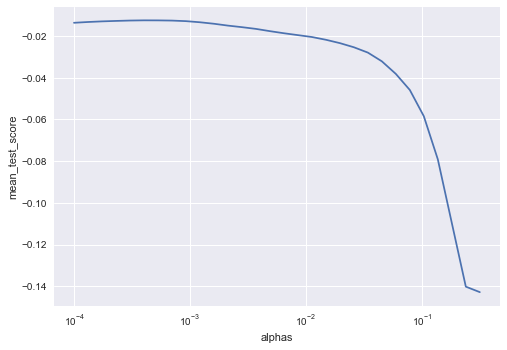

In [43]:
plt.semilogx(alphas, cv_result['mean_test_score'])
plt.xlabel('alphas')
plt.ylabel('mean_test_score')
print('best alpha:', regressor.best_params_)

In [44]:
# get the best model
best_lasso = regressor.best_estimator_

In [45]:
# take a look at the variables with largest absolute coefficients
index = abs(best_lasso.named_steps['lasso'].coef_).argsort()[::-1][:10]
lasso_var = pd.DataFrame([train.columns[index], best_lasso.named_steps['lasso'].coef_[index]]).transpose()
lasso_var.columns = ['variable', 'coefficient']
lasso_var

,variable,coefficient
0,MSZoning_C (all),-0.31173
1,TotalSF,0.136553
2,OverallCond_3,-0.131288
3,Neighborhood_Crawfor,0.115583
4,OverallCond_9,0.0951034
5,Neighborhood_StoneBr,0.0938017
6,OverallQual,0.089143
7,GrLivArea,0.081544
8,Functional_Typ,0.0768512
9,KitchenQual_Ex,0.0742366


Comparing witht the seven variables we select by hand:

`OverallQual`, `GrLivArea`, GarageCars, TotalBsmtSF, FullBath, YearBuilt, `TotalSF`

In [46]:
# make prediction
pred_train = np.exp(best_lasso.predict(train.values)) - 1
pred_test = np.exp(best_lasso.predict(test.values)) - 1

print('Train RMSE: {:.4f}'.format(get_rmse(y_train, np.log(pred_train))))

Train RMSE: 0.0966


In [47]:
# make submission
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)

#### conclusion:

The model rank 1146/4657 in the leaderboard, with score=0.12746.

###  step 2.5 Ridge Regression with all variables and parameter turning

||y - Xw||^2_2 + alpha * ||w||^2_2

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [49]:
# define your model
ridge_ = Ridge(random_state=0, max_iter=10000)
ridge = Pipeline(steps=[('RobustScaler', RobustScaler()),('ridge', ridge_)])

In [50]:
# define the parameters you would like to search
alphas = np.logspace(-4, 2, 100)
tuned_parameters = [{'ridge__alpha': alphas}]

In [51]:
# search the parameter space with cross-validation
n_folds = 5
regressor = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error')
regressor.fit(train.values, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RobustScaler', RobustScaler()),
                                       ('ridge',
                                        Ridge(max_iter=10000,
                                              random_state=0))]),
             param_grid=[{'ridge__alpha': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923...
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02])}],
             scoring='neg

In [52]:
# evaluate the cross-validation process
# since we are using negative_mean_squared_error, the larger the score, the better the model
cv_result = pd.DataFrame(regressor.cv_results_)
cv_result.sort_values('mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
83,0.062392,0.000693,0.000684,0.000018,10.7227,{'ridge__alpha': 10.722672220103231},-0.012019,-0.013657,-0.015350,-0.011057,-0.013414,-0.013100,0.001471,1
84,0.064206,0.002513,0.000747,0.000094,12.3285,{'ridge__alpha': 12.32846739442066},-0.012021,-0.013667,-0.015293,-0.011091,-0.013443,-0.013103,0.001445,2
82,0.066359,0.003338,0.000699,0.000018,9.32603,{'ridge__alpha': 9.326033468832199},-0.012020,-0.013657,-0.015419,-0.011035,-0.013394,-0.013105,0.001497,3
85,0.062875,0.002101,0.000729,0.000089,14.1747,{'ridge__alpha': 14.174741629268048},-0.012028,-0.013685,-0.015246,-0.011138,-0.013479,-0.013115,0.001421,4
81,0.067528,0.003431,0.000742,0.000115,8.11131,{'ridge__alpha': 8.111308307896872},-0.012025,-0.013665,-0.015497,-0.011026,-0.013381,-0.013119,0.001523,5
86,0.062487,0.001055,0.000683,0.000017,16.2975,{'ridge__alpha': 16.297508346206435},-0.012039,-0.013713,-0.015211,-0.011196,-0.013523,-0.013136,0.001397,6
80,0.063382,0.001130,0.000725,0.000067,7.0548,{'ridge__alpha': 7.054802310718645},-0.012034,-0.013682,-0.015584,-0.011030,-0.013377,-0.013141,0.001549,7
87,0.061269,0.000691,0.000662,0.000005,18.7382,{'ridge__alpha': 18.73817422860383},-0.012055,-0.013749,-0.015189,-0.011266,-0.013575,-0.013167,0.001374,8
79,0.066683,0.002471,0.000676,0.000016,6.13591,{'ridge__alpha': 6.135907273413176},-0.012048,-0.013708,-0.015681,-0.011046,-0.013380,-0.013172,0.001575,9
88,0.064937,0.000976,0.000712,0.000045,21.5443,{'ridge__alpha': 21.544346900318867},-0.012076,-0.013796,-0.015181,-0.011347,-0.013635,-0.013207,0.001354,10


best alpha: {'ridge__alpha': 10.722672220103231}


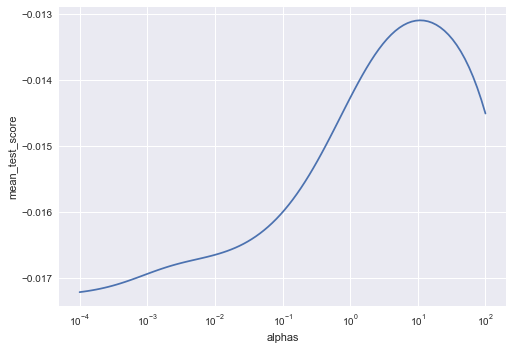

In [53]:
plt.semilogx(alphas, cv_result['mean_test_score'])
plt.xlabel('alphas')
plt.ylabel('mean_test_score')
print('best alpha:', regressor.best_params_)

In [54]:
# get the best model
best_ridge = regressor.best_estimator_

In [55]:
# take a look at the variables with largest absolute coefficients
index = abs(best_ridge.named_steps['ridge'].coef_).argsort()[::-1][:10]
lasso_var = pd.DataFrame([train.columns[index], best_ridge.named_steps['ridge'].coef_[index]]).transpose()
lasso_var.columns = ['variable', 'coefficient']
lasso_var

,variable,coefficient
0,MSZoning_C (all),-0.135991
1,OverallCond_3,-0.0965301
2,TotalSF,0.0959121
3,Neighborhood_Crawfor,0.0865259
4,OverallQual,0.0859784
5,GrLivArea,0.0852999
6,Functional_Typ,0.0767888
7,OverallCond_9,0.07652
8,Neighborhood_StoneBr,0.0723189
9,OverallCond_4,-0.0596826


The top variables overlap with the ones of lasso by a large portion

In [56]:
# make prediction
pred_train = np.exp(best_ridge.predict(train.values)) - 1
pred_test = np.exp(best_ridge.predict(test.values)) - 1

print('Train RMSE: {:.4f}'.format(get_rmse(y_train, np.log(pred_train))))

Train RMSE: 0.0943


In [57]:
# make submission
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)

#### Conclusion:

The model rank 748/4657 in the leaderboard, with score=0.12499.

### step 2.6 Principle Component Regression with all variables and parameter turning

In [58]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

It is important to do nomralization before PCA [link](https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca)

In [59]:
# stack pca and linear regression
# StandardScaler: (x - mean(x)) / std(x)
pca = PCA()
linear_reg = LinearRegression()
pcr = Pipeline(steps=[('StandardScaler', StandardScaler()),('pca', pca), ('linear_reg', linear_reg)])

In [60]:
# define the parameters you would like to search
n_comp = [8, 16, 32, 64, 128]
tuned_parameters = [{
    'pca__n_components':n_comp,
}]

In [61]:
# search the parameter space with cross-validation
n_folds = 5
regressor = GridSearchCV(pcr, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error')
regressor.fit(train.values, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('linear_reg', LinearRegression())]),
             param_grid=[{'pca__n_components': [8, 16, 32, 64, 128]}],
             scoring='neg_mean_squared_error')

In [62]:
# evaluate the cross-validation process
# since we are using negative_mean_squared_error, the larger the score, the better the model
cv_result = pd.DataFrame(regressor.cv_results_)
cv_result.sort_values('mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.039385,0.004017,0.001323,0.000172,128,{'pca__n_components': 128},-0.015914,-0.017502,-0.018829,-0.015727,-0.016428,-0.016880,0.001153,1
3,0.022483,0.003324,0.001023,0.000072,64,{'pca__n_components': 64},-0.016100,-0.017437,-0.019446,-0.015985,-0.017058,-0.017205,0.001249,2
2,0.018287,0.001217,0.001093,0.000137,32,{'pca__n_components': 32},-0.018268,-0.020085,-0.020601,-0.017865,-0.017775,-0.018919,0.001186,3
1,0.013636,0.000816,0.000896,0.000020,16,{'pca__n_components': 16},-0.019641,-0.020968,-0.024795,-0.020510,-0.019742,-0.021131,0.001897,4
0,0.020765,0.004527,0.001311,0.000467,8,{'pca__n_components': 8},-0.022948,-0.026605,-0.029333,-0.023204,-0.023497,-0.025117,0.002489,5


best n_comp: {'pca__n_components': 128}


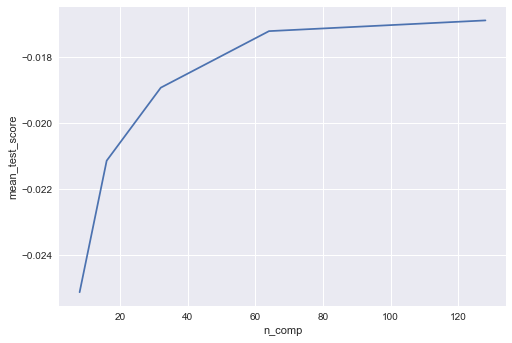

In [63]:
plt.plot(n_comp, cv_result['mean_test_score'])
plt.xlabel('n_comp')
plt.ylabel('mean_test_score')
print('best n_comp:', regressor.best_params_)

In [64]:
# get the best model
best_pcr = regressor.best_estimator_

In [65]:
# make prediction
pred_train = np.exp(best_pcr.predict(train.values)) - 1
pred_test = np.exp(best_pcr.predict(test.values)) - 1

print('Train RMSE: {:.4f}'.format(get_rmse(y_train, np.log(pred_train))))

Train RMSE: 0.1140


In [66]:
# make submission
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)

#### Conclusion:

The model rank 1504/4657 in the leaderboard, with score=0.13308.

### step 2.7 ElasticNet with all variables and parameter turning

1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [68]:
# define your model
elasticnet_ = ElasticNet(random_state=0, max_iter=10000)
elasticnet = Pipeline(steps=[('RobustScaler', RobustScaler()),('elasticnet', elasticnet_)])

In [69]:
# define the parameters you would like to search
alphas = np.logspace(-4, -2, 20)
l1_ratio = np.linspace(0.01, 0.99, 5)
tuned_parameters = [{'elasticnet__alpha': alphas,
                     'elasticnet__l1_ratio': l1_ratio}]

In [70]:
# search the parameter space with cross-validation
n_folds = 5
regressor = GridSearchCV(elasticnet, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error', verbose=4)
regressor.fit(train.values, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.01; total time=   1.7s
[CV 2/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.01; total time=   1.0s
[CV 3/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.01; total time=   1.6s
[CV 4/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.01; total time=   1.6s
[CV 5/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.01; total time=   1.8s
[CV 1/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.255; total time=   0.3s
[CV 2/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.255; total time=   0.9s
[CV 3/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.255; total time=   0.6s
[CV 4/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.255; total time=   0.3s
[CV 5/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.255; total time=   0.3s
[CV 1/5] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.5; total time=   0.5

[CV 1/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.5; total time=   0.2s
[CV 2/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.5; total time=   0.5s
[CV 3/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.5; total time=   0.3s
[CV 4/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.5; total time=   0.2s
[CV 5/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.5; total time=   0.2s
[CV 1/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.745; total time=   0.2s
[CV 2/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.745; total time=   0.7s
[CV 3/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.745; total time=   0.2s
[CV 4/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.745; total time=   0.2s
[CV 5/5] END elasticnet__alpha=0.00020691380811147902, elasticnet__l1_ratio=0.745; total tim

[CV 3/5] END elasticnet__alpha=0.00042813323987193956, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 4/5] END elasticnet__alpha=0.00042813323987193956, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 5/5] END elasticnet__alpha=0.00042813323987193956, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 1/5] END elasticnet__alpha=0.00042813323987193956, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 2/5] END elasticnet__alpha=0.00042813323987193956, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 3/5] END elasticnet__alpha=0.00042813323987193956, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 4/5] END elasticnet__alpha=0.00042813323987193956, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 5/5] END elasticnet__alpha=0.00042813323987193956, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 1/5] END elasticnet__alpha=0.000545559478116852, elasticnet__l1_ratio=0.01; total time=   0.3s
[CV 2/5] END elasticnet__alpha=0.000545559478116852, elasticnet__l1_ratio=0.01; total time

[CV 5/5] END elasticnet__alpha=0.0008858667904100823, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 1/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.01; total time=   0.3s
[CV 2/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.01; total time=   0.2s
[CV 3/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.01; total time=   0.2s
[CV 4/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.01; total time=   0.2s
[CV 5/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.01; total time=   0.3s
[CV 1/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.255; total time=   0.1s
[CV 2/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.255; total time=   0.1s
[CV 3/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.255; total time=   0.1s
[CV 4/5] END elasticnet__alpha=0.0011288378916846883, elasticnet__l1_ratio=0.255; total time=   0

[CV 3/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.255; total time=   0.1s
[CV 4/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.255; total time=   0.1s
[CV 5/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.255; total time=   0.1s
[CV 1/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.5; total time=   0.1s
[CV 2/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.5; total time=   0.1s
[CV 3/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.5; total time=   0.1s
[CV 4/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.5; total time=   0.1s
[CV 5/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.5; total time=   0.1s
[CV 1/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 2/5] END elasticnet__alpha=0.002335721469090121, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 3/5] E

[CV 2/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 3/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 4/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 5/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.745; total time=   0.1s
[CV 1/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 2/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 3/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 4/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 5/5] END elasticnet__alpha=0.004832930238571752, elasticnet__l1_ratio=0.99; total time=   0.1s
[CV 1/5] END elasticnet__alpha=0.00615848211066026, elasticnet__l1_ratio=0.01; total time=   0.1s
[CV 2/5

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RobustScaler', RobustScaler()),
                                       ('elasticnet',
                                        ElasticNet(max_iter=10000,
                                                   random_state=0))]),
             param_grid=[{'elasticnet__alpha': array([0.0001    , 0.00012743, 0.00016238, 0.00020691, 0.00026367,
       0.00033598, 0.00042813, 0.00054556, 0.00069519, 0.00088587,
       0.00112884, 0.00143845, 0.00183298, 0.00233572, 0.00297635,
       0.00379269, 0.00483293, 0.00615848, 0.0078476 , 0.01      ]),
                          'elasticnet__l1_ratio': array([0.01 , 0.255, 0.5  , 0.745, 0.99 ])}],
             scoring='neg_mean_squared_error', verbose=4)

In [71]:
# evaluate the cross-validation process
# since we are using negative_mean_squared_error, the larger the score, the better the model
cv_result = pd.DataFrame(regressor.cv_results_)
cv_result.sort_values('mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_elasticnet__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,0.105049,0.010906,0.000724,0.000023,0.000428133,0.99,"{'elasticnet__alpha': 0.00042813323987193956, ...",-0.010804,-0.012657,-0.014971,-0.010932,-0.012642,-0.012401,0.001512,1
38,0.111340,0.012199,0.000758,0.000012,0.000545559,0.745,"{'elasticnet__alpha': 0.000545559478116852, 'e...",-0.010832,-0.012664,-0.015005,-0.010930,-0.012649,-0.012416,0.001519,2
39,0.119416,0.017928,0.000793,0.000055,0.000545559,0.99,"{'elasticnet__alpha': 0.000545559478116852, 'e...",-0.010799,-0.012787,-0.014907,-0.011008,-0.012654,-0.012431,0.001483,3
43,0.128534,0.013937,0.000943,0.000079,0.000695193,0.745,"{'elasticnet__alpha': 0.0006951927961775605, '...",-0.010827,-0.012789,-0.014935,-0.010999,-0.012662,-0.012442,0.001488,4
47,0.115110,0.019595,0.000793,0.000041,0.000885867,0.5,"{'elasticnet__alpha': 0.0008858667904100823, '...",-0.010868,-0.012733,-0.015002,-0.010956,-0.012661,-0.012444,0.001508,5
42,0.149630,0.020105,0.000880,0.000158,0.000695193,0.5,"{'elasticnet__alpha': 0.0006951927961775605, '...",-0.010925,-0.012687,-0.015077,-0.010895,-0.012708,-0.012458,0.001534,6
29,0.113552,0.017092,0.000743,0.000015,0.000335982,0.99,"{'elasticnet__alpha': 0.0003359818286283781, '...",-0.010910,-0.012671,-0.015084,-0.010894,-0.012746,-0.012461,0.001541,7
33,0.109837,0.014145,0.000747,0.000023,0.000428133,0.745,"{'elasticnet__alpha': 0.00042813323987193956, ...",-0.010939,-0.012707,-0.015109,-0.010889,-0.012766,-0.012482,0.001546,8
56,0.104113,0.006959,0.000831,0.000156,0.00143845,0.255,"{'elasticnet__alpha': 0.0014384498882876629, '...",-0.011021,-0.012747,-0.015099,-0.010925,-0.012722,-0.012503,0.001519,9
52,0.103389,0.011955,0.000764,0.000019,0.00112884,0.5,"{'elasticnet__alpha': 0.0011288378916846883, '...",-0.010923,-0.012888,-0.014964,-0.011071,-0.012691,-0.012507,0.001469,10


In [72]:
# get the best model
best_elasticnet = regressor.best_estimator_

In [73]:
# make prediction
pred_train = np.exp(best_elasticnet.predict(train.values)) - 1
pred_test = np.exp(best_elasticnet.predict(test.values)) - 1

print('Train RMSE: {:.4f}'.format(get_rmse(y_train, np.log(pred_train))))

Train RMSE: 0.0970


In [74]:
# make submission
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)

#### Conclusion:

The model rank 1140/4657 in the leaderboard, with score=0.12739.

### step 2.8 Partial Least Sqaure Regression with all variables and parameter turning

In short, partial least square regression (PLS) is similar to PCR. But the difference is that, in PCR, we find latent space such that it explains most of the variance in the data. In PLS, we find latent space such that the independent and dependent variable have the maximum correlation.

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression

In [76]:
# define your model
pls_ = PLSRegression()
pls = Pipeline(steps=[('RobustScaler', RobustScaler()),('pls', pls_)])

In [77]:
# define the parameters you would like to search
n_components = [2, 4, 8, 32, 16, 64, 128]
tuned_parameters = [{'pls__n_components': n_components,
                     }]

In [78]:
# search the parameter space with cross-validation
n_folds = 5
regressor = GridSearchCV(pls, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error', verbose=4)
regressor.fit(train.values, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ............................pls__n_components=2; total time=   0.1s
[CV 2/5] END ............................pls__n_components=2; total time=   0.1s
[CV 3/5] END ............................pls__n_components=2; total time=   0.1s
[CV 4/5] END ............................pls__n_components=2; total time=   0.1s
[CV 5/5] END ............................pls__n_components=2; total time=   0.1s
[CV 1/5] END ............................pls__n_components=4; total time=   0.1s
[CV 2/5] END ............................pls__n_components=4; total time=   0.1s
[CV 3/5] END ............................pls__n_components=4; total time=   0.1s
[CV 4/5] END ............................pls__n_components=4; total time=   0.1s
[CV 5/5] END ............................pls__n_components=4; total time=   0.1s
[CV 1/5] END ............................pls__n_components=8; total time=   0.1s
[CV 2/5] END ............................pls__n_c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RobustScaler', RobustScaler()),
                                       ('pls', PLSRegression())]),
             param_grid=[{'pls__n_components': [2, 4, 8, 32, 16, 64, 128]}],
             scoring='neg_mean_squared_error', verbose=4)

In [79]:
# evaluate the cross-validation process
# since we are using negative_mean_squared_error, the larger the score, the better the model
cv_result = pd.DataFrame(regressor.cv_results_)
cv_result.sort_values('mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pls__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.069100,0.001770,0.000906,0.000046,4,{'pls__n_components': 4},-0.013573,-0.015873,-0.017558,-0.014055,-0.015588,-0.015329,0.001417,1
2,0.073380,0.002713,0.000956,0.000127,8,{'pls__n_components': 8},-0.014387,-0.016540,-0.019250,-0.014140,-0.015057,-0.015875,0.001883,2
4,0.075846,0.000814,0.000879,0.000008,16,{'pls__n_components': 16},-0.013998,-0.016851,-0.021052,-0.013777,-0.015082,-0.016152,0.002680,3
3,0.089222,0.002290,0.000946,0.000067,32,{'pls__n_components': 32},-0.015331,-0.017199,-0.022447,-0.013686,-0.014665,-0.016665,0.003110,4
5,0.114863,0.002207,0.001029,0.000243,64,{'pls__n_components': 64},-0.015288,-0.017194,-0.023402,-0.013720,-0.014595,-0.016840,0.003475,5
6,0.180577,0.019628,0.000937,0.000060,128,{'pls__n_components': 128},-0.015172,-0.017371,-0.027356,-0.013787,-0.014620,-0.017661,0.004991,6
0,0.065701,0.001598,0.001068,0.000146,2,{'pls__n_components': 2},-0.015940,-0.018620,-0.021065,-0.016287,-0.017012,-0.017784,0.001882,7


In [80]:
# get the best model
best_elasticnet = regressor.best_estimator_

In [81]:
# make prediction
pred_train = np.exp(best_elasticnet.predict(train.values)) - 1
pred_test = np.exp(best_elasticnet.predict(test.values)) - 1

print('Train RMSE: {:.4f}'.format(get_rmse(y_train, np.log(pred_train))))

Train RMSE: 0.5563


In [82]:
# make submission
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)

#### Conclusion:

The model rank 1396/4657 in the leaderboard, with score=0.13227.